# Pet Classification Model Using CNN.
Project 3 

DESCRIPTION

Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 


Project Description and Scope: 


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 


Project Guidelines:


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 
● Input layer 
● Convolutional layer 1 with 32 filters of kernel size[5,5] 
● Pooling layer 1 with pool size[2,2] and stride 2 
● Convolutional layer 2 with 64 filters of kernel size[5,5] 
● Pooling layer 2 with pool size[2,2] and stride 2 
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
● Dropout layer with dropout probability 0.4 
Predict the class by doing a softmax on the output of the dropout layers. 
This should be followed by training and evaluation: 
● For the training step, define the loss function and minimize it 
● For the evaluation step, calculate the accuracy 
Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 



Import the required libraries and locate the train and test images.

In [1]:
import numpy as np
import pandas as pd

In [2]:
path_to_train_data='./data/train'

In [3]:
import os
img_dirs=[]
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [4]:
img_dirs

['./data/train\\cats', './data/train\\dogs']

Import required libraries for image preprocessing

In [5]:
from os import listdir
from os.path import join
from numpy import asarray

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Method to pick images and convert into numeric data and label them.

In [7]:
def preparedata(folder):
    animals_df=pd.DataFrame(columns=['image_data','animal_name'])
    image_data=[]
    labels=[]
    animal_series=pd.DataFrame()
    
    img_dirs=[]
    for entry in os.scandir(folder):
        if entry.is_dir():
            img_dirs.append(entry.path)

    for img_dir in img_dirs:
        print(img_dir)
        animal_name=img_dir.split('\\')[-1]
        print(animal_name)
        for image in listdir(img_dir):

            
            
            img=load_img(join(img_dir,image),target_size=(200,200,3))
           
            image_data.append(img_to_array(img)/255)
           
            if(animal_name=='cats'):
                labels.append(0)
            else:
                labels.append(1)

         
    image_array=asarray(image_data)
    labels_array=asarray(labels)
    image_array.shape,labels_array.shape
    return image_array,labels_array

Load the train and test data

In [8]:
image_array,labels_array=preparedata('./data/train')

./data/train\cats
cats
./data/train\dogs
dogs


In [9]:
test_imagedata,test_labels=preparedata('./data/test')

./data/test\cats
cats
./data/test\dogs
dogs


Import libraries for defining the CNN layers

In [10]:
import keras
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [11]:
from keras.models import Sequential

In [12]:
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout

Define a method for model creation as per project specifications

In [13]:
def createmodel():
    model=Sequential()
    model.add(Conv2D(32, kernel_size=[5,5], activation='relu', input_shape=(200,200,3))) 
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Conv2D(64, kernel_size=[5,5], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=2))
    model.add(Dense(32,activation='relu'))
    model.add(Flatten())
    model.add(Dropout(0.4))

    model.add(Dense(1,activation='sigmoid'))
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

Create a model and fit with 100 epochs

In [14]:
model_100epochs=createmodel()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 47, 47, 32)        2080      
                                                                 
 flatten (Flatten)           (None, 70688)             0

In [15]:
history_100_epochs=model_100epochs.fit(image_array,labels_array,epochs=100)

Epoch 1/100
2/2 [==============================] - 6s 633ms/step - loss: 0.6947 - accuracy: 0.5500
Epoch 2/100
2/2 [==============================] - 3s 507ms/step - loss: 0.7015 - accuracy: 0.4500
Epoch 3/100
2/2 [==============================] - 3s 490ms/step - loss: 0.6943 - accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 3s 562ms/step - loss: 0.6865 - accuracy: 0.5250
Epoch 5/100
2/2 [==============================] - 3s 662ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 3s 635ms/step - loss: 0.7021 - accuracy: 0.4500
Epoch 7/100
2/2 [==============================] - 3s 540ms/step - loss: 0.6781 - accuracy: 0.5500
Epoch 8/100
2/2 [==============================] - 3s 547ms/step - loss: 0.6722 - accuracy: 0.7000
Epoch 9/100
2/2 [==============================] - 3s 540ms/step - loss: 0.6720 - accuracy: 0.6750
Epoch 10/100
2/2 [==============================] - 3s 597ms/step - loss: 0.6695 - accuracy: 0.6000
Epoch 11/

2/2 [==============================] - 3s 572ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 84/100
2/2 [==============================] - 3s 523ms/step - loss: 0.0424 - accuracy: 1.0000
Epoch 85/100
2/2 [==============================] - 2s 515ms/step - loss: 0.0213 - accuracy: 1.0000
Epoch 86/100
2/2 [==============================] - 2s 533ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 87/100
2/2 [==============================] - 3s 515ms/step - loss: 0.0468 - accuracy: 0.9750
Epoch 88/100
2/2 [==============================] - 3s 527ms/step - loss: 0.0167 - accuracy: 1.0000
Epoch 89/100
2/2 [==============================] - 3s 591ms/step - loss: 0.0220 - accuracy: 1.0000
Epoch 90/100
2/2 [==============================] - 3s 620ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 91/100
2/2 [==============================] - 3s 616ms/step - loss: 0.0481 - accuracy: 0.9750
Epoch 92/100
2/2 [==============================] - 3s 538ms/step - loss: 0.0310 - accuracy: 1.0000
Epoch 93/100


In [16]:
test_100_epochs=model_100epochs.evaluate(test_imagedata,test_labels,verbose=1)

1/1 [==============================] - 1s 595ms/step - loss: 1.2280 - accuracy: 0.5000


Create a new model with same layers to test for 200 epochs

In [17]:
model_200epochs=createmodel()
history_200_epochs=model_200epochs.fit(image_array,labels_array,epochs=200)
test_200_epochs=model_200epochs.evaluate(test_imagedata,test_labels)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dense_2 (Dense)             (None, 47, 47, 32)        2080      
                                                                 
 flatten_1 (Flatten)         (None, 70688)            

2/2 [==============================] - 3s 571ms/step - loss: 0.1088 - accuracy: 0.9500
Epoch 67/200
2/2 [==============================] - 3s 574ms/step - loss: 0.2382 - accuracy: 0.8750
Epoch 68/200
2/2 [==============================] - 3s 528ms/step - loss: 0.1665 - accuracy: 0.9500
Epoch 69/200
2/2 [==============================] - 3s 585ms/step - loss: 0.1661 - accuracy: 0.9250
Epoch 70/200
2/2 [==============================] - 3s 573ms/step - loss: 0.1398 - accuracy: 0.9500
Epoch 71/200
2/2 [==============================] - 3s 614ms/step - loss: 0.1655 - accuracy: 0.9250
Epoch 72/200
2/2 [==============================] - 3s 521ms/step - loss: 0.0955 - accuracy: 0.9750
Epoch 73/200
2/2 [==============================] - 3s 675ms/step - loss: 0.0736 - accuracy: 1.0000
Epoch 74/200
2/2 [==============================] - 3s 687ms/step - loss: 0.1191 - accuracy: 1.0000
Epoch 75/200
2/2 [==============================] - 3s 768ms/step - loss: 0.0759 - accuracy: 0.9750
Epoch 76/200


2/2 [==============================] - 3s 632ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 148/200
2/2 [==============================] - 4s 702ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 149/200
2/2 [==============================] - 3s 582ms/step - loss: 0.0211 - accuracy: 0.9750
Epoch 150/200
2/2 [==============================] - 3s 643ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 151/200
2/2 [==============================] - 3s 562ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 152/200
2/2 [==============================] - 4s 733ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 153/200
2/2 [==============================] - 3s 878ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 154/200
2/2 [==============================] - 4s 787ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 155/200
2/2 [==============================] - 4s 702ms/step - loss: 0.0083 - accuracy: 1.0000
Epoch 156/200
2/2 [==============================] - 3s 568ms/step - loss: 0.0038 - accuracy: 1.0000
Epoc

Create a new model with same layers to test for 300 epochs

In [18]:
model_300epochs=createmodel()
history_300_epochs=model_300epochs.fit(image_array,labels_array,epochs=300)
test_300_epochs=model_300epochs.evaluate(test_imagedata,test_labels)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 47, 47, 32)        2080      
                                                                 
 flatten_2 (Flatten)         (None, 70688)            

2/2 [==============================] - 3s 563ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 67/300
2/2 [==============================] - 3s 732ms/step - loss: 0.0782 - accuracy: 1.0000
Epoch 68/300
2/2 [==============================] - 3s 593ms/step - loss: 0.0911 - accuracy: 0.9500
Epoch 69/300
2/2 [==============================] - 3s 547ms/step - loss: 0.0522 - accuracy: 0.9750
Epoch 70/300
2/2 [==============================] - 3s 567ms/step - loss: 0.0330 - accuracy: 1.0000
Epoch 71/300
2/2 [==============================] - 3s 572ms/step - loss: 0.0605 - accuracy: 1.0000
Epoch 72/300
2/2 [==============================] - 3s 588ms/step - loss: 0.0309 - accuracy: 1.0000
Epoch 73/300
2/2 [==============================] - 3s 531ms/step - loss: 0.0433 - accuracy: 1.0000
Epoch 74/300
2/2 [==============================] - 3s 547ms/step - loss: 0.0335 - accuracy: 1.0000
Epoch 75/300
2/2 [==============================] - 3s 542ms/step - loss: 0.0346 - accuracy: 1.0000
Epoch 76/300


2/2 [==============================] - 3s 514ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 148/300
2/2 [==============================] - 3s 533ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 149/300
2/2 [==============================] - 3s 530ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 150/300
2/2 [==============================] - 2s 516ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 151/300
2/2 [==============================] - 3s 516ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 152/300
2/2 [==============================] - 3s 594ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 153/300
2/2 [==============================] - 3s 515ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 154/300
2/2 [==============================] - 3s 516ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 155/300
2/2 [==============================] - 3s 520ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 156/300
2/2 [==============================] - 2s 519ms/step - loss: 0.0020 - accuracy: 1.0000
Epoc

2/2 [==============================] - 3s 553ms/step - loss: 9.5254e-04 - accuracy: 1.0000
Epoch 228/300
2/2 [==============================] - 2s 509ms/step - loss: 8.5828e-04 - accuracy: 1.0000
Epoch 229/300
2/2 [==============================] - 3s 562ms/step - loss: 5.7731e-04 - accuracy: 1.0000
Epoch 230/300
2/2 [==============================] - 3s 545ms/step - loss: 9.9856e-04 - accuracy: 1.0000
Epoch 231/300
2/2 [==============================] - 2s 513ms/step - loss: 9.0596e-04 - accuracy: 1.0000
Epoch 232/300
2/2 [==============================] - 3s 540ms/step - loss: 9.8826e-04 - accuracy: 1.0000
Epoch 233/300
2/2 [==============================] - 2s 507ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 234/300
2/2 [==============================] - 2s 518ms/step - loss: 5.6702e-04 - accuracy: 1.0000
Epoch 235/300
2/2 [==============================] - 3s 568ms/step - loss: 7.6670e-04 - accuracy: 1.0000
Epoch 236/300
2/2 [==============================] - 3s 567ms/step - loss

Visualise the accuracy and loss for 100,200 and 300 iterations

In [19]:
from matplotlib import pyplot
def summarize_diagnostics(history_train,history_test):
# plot loss
    fig = pyplot.figure(figsize=(8,8))  
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history_train.history['loss'], color='blue', label='train')
    pyplot.plot(history_test[1], color='orange', label='test')
    
    pyplot.legend()
    
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history_train.history['accuracy'], color='blue', label='train')
    pyplot.plot(history_test[1], color='orange', label='test')
    
    pyplot.legend()   
    pyplot.tight_layout()
    pyplot.show()

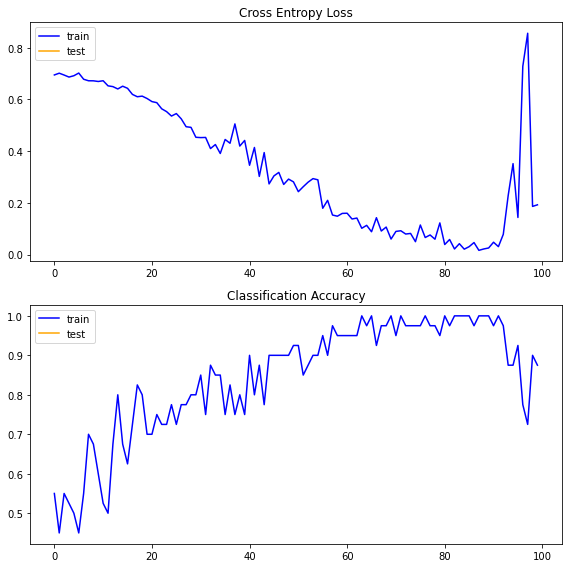

In [20]:
summarize_diagnostics(history_100_epochs,test_100_epochs)

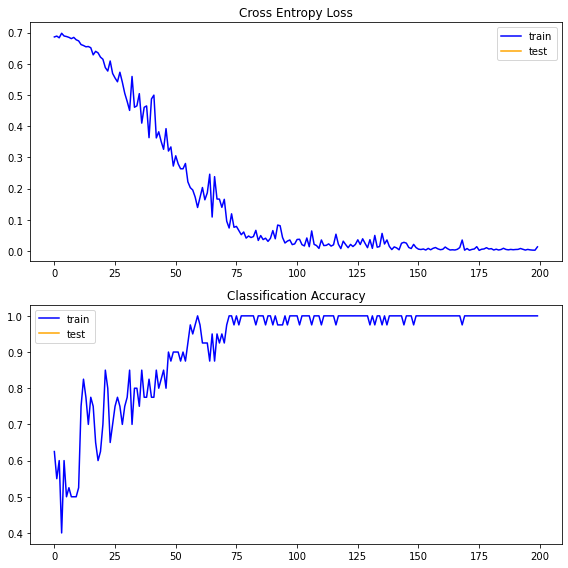

In [21]:
summarize_diagnostics(history_200_epochs,test_200_epochs)

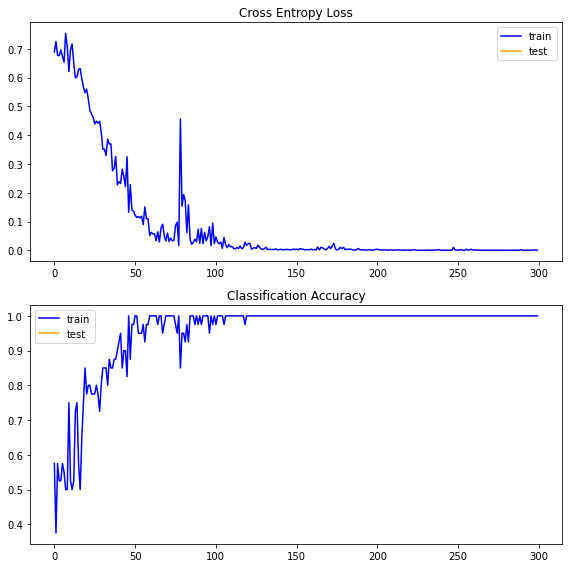

In [22]:
summarize_diagnostics(history_300_epochs,test_300_epochs)

Compare the accuracy from three models( 100,200,300 iterations each)

In [23]:
print("Accuracy on test data with 100 epochs: ",round(test_100_epochs[1],2)," Loss:",round(test_100_epochs[0],2))
print("Accuracy on test data with 200 epochs: ",round(test_200_epochs[1],2)," Loss:",round(test_200_epochs[0],2))
print("Accuracy on test data with 300 epochs: ",round(test_300_epochs[1],2)," Loss:",round(test_300_epochs[0],2))

Accuracy on test data with 100 epochs:  0.5  Loss: 1.23
Accuracy on test data with 200 epochs:  0.6  Loss: 2.14
Accuracy on test data with 300 epochs:  0.6  Loss: 2.02
